In [1]:
import configs as c

from timeit import default_timer as timer

from datetime import timedelta
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Run model

In [2]:
from model import markov_withDM as mk_dm
from model import markov as mk

import transition_matrix as tm
import model_functions as mf

In [3]:
with open('var23.pickle', 'rb') as handle:
    tp = pickle.load(handle)
tmx = tm.set_transition_matrix(tp)

In [4]:
# m0 = mk_dm(tmx, c.d_factor)
m0 = mk(tmx)
states_total, cases = m0.run_markov()

### see results

In [5]:
dt1, dt2, dt3, dt4, pcmort = mf.get_incidence(np.array(states_total), cases['dt1'], cases['dt2'], cases['dt3'], cases['dt4'], cases['pcmort'])

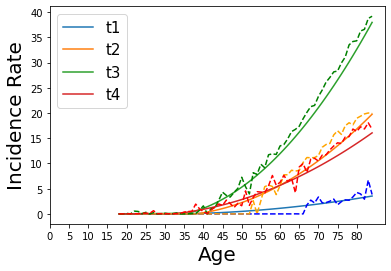

In [6]:
c.target_inc.index = list(c.age_range)
c.target_inc.plot()

plt.plot(list(c.age_range), dt1,'b--')
plt.plot(list(c.age_range), dt2, color = 'orange', linestyle= '--')
plt.plot(list(c.age_range), dt3, 'g--')
plt.plot(list(c.age_range), dt4, 'r--')
plt.legend(['t1', 't2', 't3', 't4'], fontsize=15)
plt.xticks(list(range(0,85,5)))
plt.ylabel('Incidence Rate', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.show()

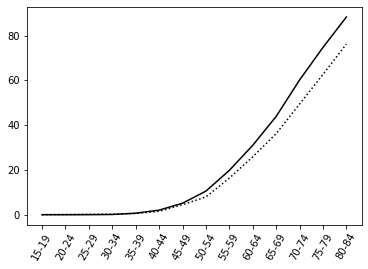

In [7]:
plt.plot(c.age_group, c.target_pcmort.values, 'k')
plt.plot(c.age_group, mf.grouping(pcmort), 'k:')
plt.xticks(rotation = 60)
plt.show()

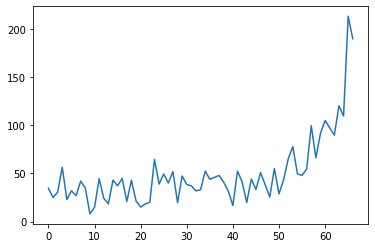

In [9]:
plt.plot(mf.sojourn_time(tmx))
time36 = np.array(mf.sojourn_time(tmx))

# Calibration

In [1]:
from calibration import sim_anneal
import configs as c

from timeit import default_timer as timer

from datetime import timedelta
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
start = timer()
cal_markov = sim_anneal(tp_path = 'var0.pickle', age_var = 1, model = 'mk', save = 'var0test.pickle')
cal_tp = cal_markov.anneal()
end = timer()
print(f'total time: {timedelta(seconds=end-start)}')